# Building Damage Grade by Earthquake (Exploratory Data Analysis)


## Dataset Preparation

### Contents:

- [Loading the Dataset](#loading-the-dataset)
  - [Importing Libraries](#imported-python-libraries)
  - [Import Dataset](#load-the-dataset)
- [Data Inspection](#data-inspection)
  - [Dataframe Shape](#dataframe-shape)
  - [Dataframe Head](#dataframe-head)
  - [Dataframe Tail](#dataframe-tail)
- [Dataframe Columns](#dataframe-columns)
  - [Column Datatypes](#columns-datatypes)
- [Data Cleaning](#data-cleaning)


### Loading the Dataset

#### Imported Python Libraries

|  Library  |          Purpose           |
| :-------: | :------------------------: |
|  Pandas   |         Dataframes         |
|   Numpy   |    Numerical computing     |
| Matplolib |   General Visualizations   |
|  Seaborn  | Statistical Visualizations |
|  Sklearn  |    Modelling Framework     |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter, MultipleLocator
import seaborn as sns
import plotly.graph_objects as go
from math import pi

# Plotting Style
plt.style.use('ggplot')

custom_colors =  ['#001219', '#005f73', '#0a9396',
                '#94d2bd', '#e9d8a6', '#ee9b00',
                '#ca6702', '#bb3e03', '#ae2012',
                '#9b2226']

#### Load the Dataset


In [2]:
df = pd.read_csv('./Datasets/earthquake_nepal/csv_building_structure.csv', index_col = 'building_id')

#### Data Inspection

- Dataframe `shape`
- Dataframe `head` and `tail`
- Dataframe datatypes `dtypes`
- Dataframe statistics `describe`


##### Dataframe Shape

Output: (`Rows`, `Columns`)


In [3]:
df.shape

(762106, 30)

In [4]:
print("The dataframe has {} rows and {} columns".format(*df.shape))

The dataframe has 762106 rows and 30 columns


##### Dataframe Head

Display the topmost rows of the Dataframe


In [5]:
df.head()   # Default: 5 rows

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
building_id,,,,,,,,,,,,,,,,,,,,,
120101000011,12,1207,120703,1,1,9,288,9,9,Flat,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
120101000021,12,1207,120703,1,1,15,364,9,9,Flat,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
120101000031,12,1207,120703,1,1,20,384,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
120101000041,12,1207,120703,1,1,20,312,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
120101000051,12,1207,120703,1,1,30,308,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


##### Dataframe Tail

Display the bottommost of the Dataframe


In [6]:
df.tail(10) # Display last 10 rows

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
building_id,,,,,,,,,,,,,,,,,,,,,
366709001201,36,3603,360302,2,0,35,598,18,0,Flat,...,0,0,0,0,0,0,0,Damaged-Rubble Clear-New building built,Grade 5,Reconstruction
366709001211,36,3603,360302,2,0,30,598,18,0,Flat,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
366709001221,36,3603,360302,2,2,13,513,18,18,Flat,...,0,0,0,0,0,0,0,Not damaged,Grade 1,Minor repair
366709001222,36,3603,360302,2,0,9,513,18,0,Flat,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
366709001231,36,3603,360302,2,2,13,513,18,18,Flat,...,0,0,0,0,0,0,0,Not damaged,Grade 1,Minor repair
366709001241,36,3603,360302,2,0,60,165,18,0,Flat,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
366709001251,36,3603,360302,2,0,35,342,18,0,Flat,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
366709001261,36,3603,360302,2,0,35,342,18,0,Flat,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
366709001271,36,3603,360302,2,0,19,306,18,0,Flat,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction


#### Dataframe Columns

Display all column names of the Dataframe


In [7]:
df.columns

Index(['district_id', 'vdcmun_id', 'ward_id', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed'],
      dtype='object')

In [8]:
damage_grade_mapping = {'Grade 1': 1, 'Grade 2': 2, 'Grade 3': 3, 'Grade 4': 4, 'Grade 5': 5}
df['damage_grade_numeric'] = df['damage_grade'].map(damage_grade_mapping)

del damage_grade_mapping

##### Columns Datatypes

List all columns with its datatypes


In [9]:
df.dtypes

district_id                                 int64
vdcmun_id                                   int64
ward_id                                     int64
count_floors_pre_eq                         int64
count_floors_post_eq                        int64
age_building                                int64
plinth_area_sq_ft                           int64
height_ft_pre_eq                            int64
height_ft_post_eq                           int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64


##### Convert Data Types to Categorical


In [10]:
df = df.astype({'district_id': 'str',
                'vdcmun_id': 'str',
                'ward_id': 'str'})

In [11]:
df.dtypes

district_id                                object
vdcmun_id                                  object
ward_id                                    object
count_floors_pre_eq                         int64
count_floors_post_eq                        int64
age_building                                int64
plinth_area_sq_ft                           int64
height_ft_pre_eq                            int64
height_ft_post_eq                           int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64


##### Dataframe Basic Statistics


In [12]:
df.describe()

,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade_numeric
count,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762094.000000
mean,2.087783,1.252058,24.326405,406.672576,16.049372,9.868817,0.042401,0.800271,0.035121,0.015815,0.022961,0.071525,0.258766,0.080482,0.039794,0.016386,0.012026,3.643607
std,0.655101,1.063275,65.043704,226.779371,5.493878,8.574169,0.201502,0.399797,0.184086,0.124761,0.149780,0.257701,0.437957,0.272039,0.195474,0.126955,0.109001,1.342606
min,1.000000,0.000000,0.000000,70.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,9.000000,280.000000,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2.000000,1.000000,16.000000,358.000000,16.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,2.000000,2.000000,27.000000,470.000000,18.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,9.000000,9.000000,999.000000,5000.000000,99.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


#### Data Cleaning

Identifying Rows with Missing Values / Null Values


In [13]:
df_temp = df.isnull().sum().reset_index(name='count').copy()
display(df_temp[df_temp['count'] > 0])

del df_temp

,index,count
14,position,1
15,plan_configuration,1
28,damage_grade,12
29,technical_solution_proposed,12
30,damage_grade_numeric,12


Dropping Rows with Missing Values / Null Values


In [14]:
df.dropna(inplace=True)

## Analysis


In [15]:
def pie_chart(column = None, 
              color = custom_colors[4::],
              title = None, 
              font_size = 28, 
              title_x = 0.5, 
              title_y = 0.95,
              legend_x = 1,
              legend_y = 0.5):
    
    ax = df[column].value_counts().reset_index(name='count')
    print(ax, f"\n{ax.sum()}\n")
    labels = ax[column]
    values = ax['count']

    fig = go.Figure(data=[go.Pie(labels=labels,
                                values=values, 
                                marker_colors=color)])

    fig.update_traces(hoverinfo='label+value')

    fig.update_layout(
        title=title,
        title_font_size=font_size,
        title_x=title_x,
        title_y=title_y,
        legend=dict(x=legend_x, y=legend_y)
    )
    fig.show()

    del ax, labels, values, fig

In [16]:
def heatmap(column=None,
            color=custom_colors,
            title=None,
            title_font_size=28,
            x_title=None,
            y_title=None,
            title_x=0.5,
            title_y=0.95,
            invert_axis=False):
    # Group by <chosen column> and 'damage_grade' and calculate counts
    df_temp = df.groupby([column, 'damage_grade']).size().reset_index(name='count')

    # Calculate Proportion of 'damage_grade' within each <chosen column>
    df_temp['proportion'] = df_temp.groupby(column)['count'].transform(lambda x: 100 * x / x.sum())

    # Pivot the table to have 'damage_grade' as columns and <chosen column> as index
    if invert_axis:
        df_pivot = pd.pivot_table(df_temp, values='proportion', index=column, columns='damage_grade', fill_value=0)
    else:
        df_pivot = pd.pivot_table(df_temp, values='proportion', index='damage_grade', columns=column, fill_value=0)


    fig = px.imshow(df_pivot.values,
                    labels=dict(x=x_title, 
                                y=y_title, 
                                color="Proportion"),
                    x=df_pivot.columns,
                    y=df_pivot.index,
                    color_continuous_scale=color)
    
    fig.update_layout(
        title=title,
        title_font_size=title_font_size,
        xaxis_title=x_title,
        yaxis_title=y_title,
        title_x = title_x,
        title_y = title_y,
        height=500)
    
    fig.show()

    del df_temp, df_pivot, fig

In [17]:
def stacked_bar(column=None, title=None, x_title=None, y_title=None, color=custom_colors[4::]):
    # Calculate counts
    df_temp = df.groupby([column, 'damage_grade']).size().reset_index(name='count')

    # Set Index
    df_temp = df_temp.set_index([column, 'damage_grade'])

    # Calculate Proportion of Damage Grade
    df_temp['proportion'] = df_temp.groupby(level=0)['count'].apply(lambda x: x * 100 / x.sum()).reset_index(level=0, drop=True)

    # Reset index to keep 'foundation_type' and 'damage_grade' as columns
    df_temp = df_temp.reset_index()

    fig = px.bar(df_temp, 
                x=column,
                y="proportion", 
                color="damage_grade", 
                text_auto=".2f",
                color_discrete_sequence=color)

    fig.update_layout(
        title=title,
        title_font_size=28,
        xaxis_title=x_title,
        yaxis_title=y_title,
        legend_title='Damage Grade',
        yaxis={'categoryorder': 'total descending'}
    )

    fig.show()
    
    del df_temp, fig


In [18]:
def bar(column=None, title=None, x_title=None, y_title=None, color=custom_colors[4::]):
    # Calculate counts
    df_temp = df.groupby([column,'damage_grade']).size().reset_index(name='count')

    # Calculate proportions
    df_temp['proportion'] = df_temp.groupby(column)['count'].transform(lambda x: x * 100 / x.sum())

    # Create a list of bar traces for each damage grade
    bar_traces = []
    for damage_grade in df_temp['damage_grade'].unique():
        temp_df = df_temp[df_temp['damage_grade'] == damage_grade]
        bar_trace = go.Bar(
            x=temp_df[column],
            y=temp_df['proportion'],
            name=damage_grade,
            marker_color=custom_colors[len(bar_traces)+5],
        )
        bar_traces.append(bar_trace)

    layout = go.Layout(
        title=title,
        title_font_size=28,
        xaxis=dict(title=x_title),
        yaxis=dict(title=y_title,
                tickformat='.2f'),
        barmode='group',
        legend_title='Damage Grade',
        legend=dict(x=1, y=0.5),
    )

    fig = go.Figure(data=bar_traces, layout=layout)

    fig.show()

    del df_temp, bar_traces, layout, fig

### Categorical Variables

In this part, we selected categorical variables. These variables will be explored in turn to understand how they relate to the damage grade classification.


In [19]:
ax = df['damage_grade'].value_counts().reset_index(name='count')

ax = ax.sort_values(by='damage_grade', ascending=True)

fig = px.bar(ax,
             title="Damage Grade Counts",
             x='count', 
             y='damage_grade', 
             orientation='h', 
             color='damage_grade',
             color_discrete_sequence=custom_colors[4::])

fig.update_layout(
    title="Damage Grade Counts",
    title_font_size=28,
    xaxis_title="Counts",
    yaxis_title="Damage Grade",
    yaxis={'categoryorder': 'total descending'}
)

fig.show()

del ax, fig

##### Variable: `district_id`


In [20]:
df.select_dtypes(include=object).dtypes

district_id                    object
vdcmun_id                      object
ward_id                        object
land_surface_condition         object
foundation_type                object
roof_type                      object
ground_floor_type              object
other_floor_type               object
position                       object
plan_configuration             object
condition_post_eq              object
damage_grade                   object
technical_solution_proposed    object
dtype: object

Calculate Counts


The first variable to analyse is the district, we can see from the plot below that most districts are spread relatively evenly across all damage grades. There are a few examples of districts which are mostly associated with grade 5.


In [21]:
heatmap(column='district_id',
        title='Damage Grade by District',
        x_title='District ID',
        y_title='Damage Grade',
        color=custom_colors[4::])

##### Variable: `vdcmun_id`, `ward_id`

There are certain clusters of 'vdcmun_id' which are associated with different grades. One example is the ids associated with grade 5.


In [22]:
print("vdcmun Wards: {}".format(len(df.vdcmun_id.unique())))
print("Unique Wards: {}".format(len(df.ward_id.unique())))

vdcmun Wards: 110
Unique Wards: 945


The output above shows that there are 110 vdcmun and 945 unique ward_id's in the dataset. It might be prudent to do some dimensionality reduction when it comes to model building.


##### Variable: `land_surface_condition`


Starting with the land surface condition, the plot below indicates that the vast majority (80% +) of buildings have a flat surface. Roughly 15% of buildings were on land with a moderate slope and the smallest percentage (less than 5%) had a severe slope.


In [23]:
pie_chart(column='land_surface_condition',
          title='Distribution of Land Surface Conditions',
          legend_x=0.65)

  land_surface_condition   count
0                   Flat  631663
1         Moderate slope  105640
2            Steep slope   24791 
land_surface_condition    FlatModerate slopeSteep slope
count                                            762094
dtype: object



In [24]:
stacked_bar(column='land_surface_condition', title='Percentage of Damage Grade by Land Surface Type',x_title='Land Surface Condition', y_title='Percentage (%)')
# bar(column='land_surface_condition', title='Percentage of Damage Grade by Land Surface Type',x_title='Land Surface Condition', y_title='Percentage (%)')

The plot above combines the land condition with the damage grade for each building. The plot is converted to show how each grade is distributed amongst the three land surface conditions. The proportion of grades 1 and 2 is much closer for buildings on flat and steep sloped group, but much more evenly spaced out for building on a moderate slope. In all cases the frequency of grade is correlated with the label of the grade.


#### Variable: `foundation_type`


Moving on to the next categorical variable, the output below shows that there are 5 entries in the foundation type, with the 5th option being a grouping of less popular options. The most common foundation is mortar, it is then a big jump down to bamboo as the next most popular option. The chart shows quite a change in the distribution of foundation types vs damage grade. Bambo and cement foundations tend to see an inverse relationship with grade, grade 1 is the most popular and this decreases as the grade classification increments. Mud mortar foundations have a very different relationship with damage grade in which it follows the proportions of the overal grade variable. Other and RC show a less consistent pattern with damage grade, which could be driven by the smaller sample size (especially for other). Visually this variable appears to have some degree of predictive power.


In [25]:
pie_chart(column='foundation_type',
          title='Distribution of Foundation Type',
          legend_x=0.7)

          foundation_type   count
0  Mud mortar-Stone/Brick  628705
1           Bamboo/Timber   57472
2      Cement-Stone/Brick   39245
3                      RC   32120
4                   Other    4552 
foundation_type    Mud mortar-Stone/BrickBamboo/TimberCement-Ston...
count                                                         762094
dtype: object



In [26]:
stacked_bar(column='foundation_type', title='Percentage of Damage Grade by Foundation Type',x_title='Foundation Type', y_title='Percentage (%)')
# bar(column='foundation_type', title='Percentage of Damage Grade by Foundation Type',x_title='Land Surface Condition', y_title='Percentage (%)')a

#### Variable: `roof_type`


In [27]:
pie_chart(column='roof_type',
          title='Distribution of Roof Type',
          legend_x=0.65)

                  roof_type   count
0  Bamboo/Timber-Light roof  503736
1  Bamboo/Timber-Heavy roof  213774
2                RCC/RB/RBC   44584 
roof_type    Bamboo/Timber-Light roofBamboo/Timber-Heavy ro...
count                                                   762094
dtype: object



According to the roof type variable there are three different types of roof. The vast majority of buildings have the Bamboo-Timber/ light roof, but there are still over 200k (82.5%) buildings with timber heavy and just over 5k (4.2%) with RC.


In [28]:
heatmap(column='roof_type',
        title='Damage Grade by Roof Type',
        x_title='Damage Grade',
        y_title='Roof Type',
        color=custom_colors[3::],
        invert_axis=True)

The spread of building between roof type and grade is quite similar for the types with Bamboo and timber. Roof type RCC actually is most commonly associated with grade 1 and then 2, it is minimally associated with grades 4 and 5. Given the similarities between the two bamboo/ timber roof types, they could potentially be grouped together.


#### Variable: `ground_floor_type`


In [29]:
pie_chart(column='ground_floor_type',
          title='Distribution of Ground Floor Type',
          legend_x=0.7)

  ground_floor_type   count
0               Mud  618205
1                RC   73149
2       Brick/Stone   66093
3            Timber    3594
4             Other    1053 
ground_floor_type    MudRCBrick/StoneTimberOther
count                                     762094
dtype: object



In [30]:
heatmap(column='ground_floor_type',
        title='Damage Grade by Ground Floor Type',
        x_title='Damage Grade',
        y_title='Roof Type',
        color=custom_colors[3::],
        invert_axis=True)

There are multiple types of ground floor material used across the buildings, one the most popular is Mud which can be seen above. RC and Brick are distant second/ third place but occur quite frequently. Interestingly the association between ground type and damage grade differs quite significantly dependent on materials used for the ground. Materials Other and Timber are spread quite evenly across the grades, while brick/ stone and mud are more often associated with the higher grades 4 and 5, RC is most commonly associated with the lower grades. These patterns indicate that this variable might have some predictive power.


#### Variable: `other_floor_type`


In [31]:
pie_chart(column='other_floor_type',
          title='Distribution of Other Floor Types',
          legend_x=0.65)

    other_floor_type   count
0  TImber/Bamboo-Mud  486907
1      Timber-Planck  123624
2     Not applicable  118821
3         RCC/RB/RBC   32742 
other_floor_type    TImber/Bamboo-MudTimber-PlanckNot applicableRC...
count                                                          762094
dtype: object



In [32]:
stacked_bar(column='other_floor_type', title='Percentage of Damage Grade by Other Floor Type',x_title='Other Floor Type', y_title='Percentage (%)')
# bar(column='other_floor_type', title='Percentage of Damage Grade by Other Floor Type',x_title='Other Floor Condition', y_title='Percentage (%)')

In [33]:
heatmap(column='other_floor_type',
        title='Damage Grade by Other Floor Types',
        x_title='Damage Grade',
        y_title='Other Floor Types',
        color=custom_colors[3::],
        invert_axis=True)

The two outputs above are focused on the `other_floor_type` variable, we can see that timber/bamboo-mud is very common flooring material, existing in over 63% of homes. There is also an option called not applicable, indicating that some buildings only have a ground floor, which might be worth creating a feature to extract. Beyond this the chart below shows that the timber based materials share a similar relationship with damage grade, it might be useful to group these up. RCC has a bigger association with the lower grades and N/A provides a slight mix with grade 5 and 1 appearing the most often.


#### Variable: `position`


In [34]:
pie_chart(column='position',
          title='Distribution of Positions',
          legend_x=0.7)

          position   count
0     Not attached  604443
1  Attached-1 side  129431
2  Attached-2 side   26910
3  Attached-3 side    1310 
position    Not attachedAttached-1 sideAttached-2 sideAtta...
count                                                  762094
dtype: object



In [35]:
stacked_bar(column='position', title='Percentage of Damage Grade by Position',x_title='Position', y_title='Percentage (%)')
# bar(column='position', title='Percentage of Damage Grade by Position',x_title='Position', y_title='Percentage (%)')

With regards to the position of the building, there can be an attachment between 1 and 3 sides or no attachment at all. As with other features which have been explored, there is a dominate attribute amongst buildings or lack of in this case. 'Not attached' position accounts for almost 80% of buildings in the dataset. The association between position and damage grade of buildings differ less when compared with No attachment and buildings with an attachment on one-side. Buildings with 2 and 3 side attachments appear to have different patterns to the rest.


#### Variable: `plan_configuration`


In [36]:
pie_chart(column='plan_configuration',
          title='Distribution of Plan Configurations',
          font_size=20,
          title_x=0.05,
          title_y=0.5,
          legend_x=0.7)

                plan_configuration   count
0                      Rectangular  731246
1                           Square   17576
2                          L-shape   10079
3                          T-shape     969
4                  Multi-projected     940
5                           Others     518
6                          U-shape     448
7                          E-shape     140
8  Building with Central Courtyard      98
9                          H-shape      80 
plan_configuration    RectangularSquareL-shapeT-shapeMulti-projected...
count                                                            762094
dtype: object



In [37]:
heatmap(column='plan_configuration',
        title='Damage Grade by Plan Configurations',
        x_title='Plan Configurations',
        y_title='Damage Grade',
        color=custom_colors[3::],
        invert_axis=False)

The plan configuration represents the general shape of the building and we can see from the output above that there are 10 different types of plot shape. The most popular type of plot shape is rectangular, followed by square and then L-shape. Generally speaking most shapes are evenly spread across the damage grades, however there are a few which index slightly higher on one grade or another. Examples being 'building with central courtyard' and 'others' having a higher association with lower grades. 'Rectangular' and 'square' index higher on grade 5.


#### Variable: `condition_post_eq`


In [38]:
pie_chart(column='condition_post_eq',
          title='Post Earthquation Conditions Distribution',
          legend_x=0.7,
          color=custom_colors[2::])

                         condition_post_eq   count
0                         Damaged-Not used  207968
1                   Damaged-Rubble unclear  125650
2                     Damaged-Used in risk  123843
3                Damaged-Repaired and used  107791
4                     Damaged-Rubble clear  102191
5                              Not damaged   61139
6  Damaged-Rubble Clear-New building built   33130
7                     Covered by landslide     382 
condition_post_eq    Damaged-Not usedDamaged-Rubble unclearDamaged-...
count                                                           762094
dtype: object



In [39]:
heatmap(column='condition_post_eq',
        title='Damage Grade by Post Earthquake Conditions',
        x_title='Post Earthquake Conditions',
        y_title='Damage Grade',
        color=custom_colors[4::],
        invert_axis=False)

The condition field appears to evaluate the standing of the building after the earthquake. There are several common recordings, unfortunately all pointing towards some form of damage (only 8% were not damaged). The chart allows us to interpret the grades with a little more clarity, we can see that grade 5 appears to represent the buildings which were damaged the most, we see some conditions align solely to particular grades.


#### Variable: `technical_solution_proposed`


In [40]:
pie_chart(column='technical_solution_proposed',
          title='Technical Solution Proposed',
          legend_x=0.7)

  technical_solution_proposed   count
0              Reconstruction  470219
1                Major repair  129415
2                Minor repair  110605
3                     No need   51855 
technical_solution_proposed    ReconstructionMajor repairMinor repairNo need
count                                                                 762094
dtype: object



In [41]:
heatmap(column='technical_solution_proposed',
        title='Damage Grade by Technical Solution Proposed',
        x_title='Damage Grade',
        y_title='Technical Solution Proposed',
        color=custom_colors[4::],
        invert_axis=True)

The final categorical variable identifies the scale of damage caused to the building into 4 groups going from no need to intervention to complete reconstruction. The majority of buildings required reconstruction or some degree of repair. The plot shows a nice pattern, ultimately Grade 1 buildings not requiring any intervention, grades 2 and 3 requiring minor and major repair respectively and then grades 4 and 5 requiring reconstruction.


### Numerical Variables

This section is focussed on exploring the relationship between damage grade and the numerical variables. As with the categorical subsection, the aim is to identify variables which may have predictive power. We can see from the print out below that there are 17 variables with type numerical.


In [42]:
df.select_dtypes(include=[float, int]).dtypes

count_floors_pre_eq                         int64
count_floors_post_eq                        int64
age_building                                int64
plinth_area_sq_ft                           int64
height_ft_pre_eq                            int64
height_ft_post_eq                           int64
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64
has_superstructure_cement_mortar_brick      int64
has_superstructure_timber                   int64
has_superstructure_bamboo                   int64
has_superstructure_rc_non_engineered        int64
has_superstructure_rc_engineered            int64
has_superstructure_other                    int64
damage_grade_numeric                      float64
dtype: object

In [43]:
df.iloc[:, 16:].head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,damage_grade_numeric
building_id,,,,,,,,,,,,,,,
120101000011,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair,3.0
120101000021,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction,5.0
120101000031,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair,2.0
120101000041,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair,2.0
120101000051,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair,1.0


In [44]:
df.describe().transpose().drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
count_floors_pre_eq,2.087787,0.655104,1.0,2.0,2.0,2.0,9.0
count_floors_post_eq,1.252050,1.063278,0.0,0.0,1.0,2.0,9.0
age_building,24.325031,65.034555,0.0,9.0,16.0,27.0,999.0
plinth_area_sq_ft,406.673668,226.780437,70.0,280.0,358.0,470.0,5000.0
height_ft_pre_eq,16.049424,5.493900,6.0,12.0,16.0,18.0,99.0
height_ft_post_eq,9.868785,8.574218,0.0,0.0,11.0,16.0,99.0
has_superstructure_adobe_mud,0.042402,0.201504,0.0,0.0,0.0,0.0,1.0
has_superstructure_mud_mortar_stone,0.800269,0.399799,0.0,1.0,1.0,1.0,1.0
has_superstructure_stone_flag,0.035122,0.184087,0.0,0.0,0.0,0.0,1.0
has_superstructure_cement_mortar_stone,0.015816,0.124762,0.0,0.0,0.0,0.0,1.0


The output above shows the descriptive statistics about the numerical variables in our dataset. First thing to notice is that all the variables which have the 'has' prefix are binary variables (0 for false, 1 for true). For the variables which aren't binary we can see that the mean and median values of the columns tend to be in a reasonable range indicating an absense of extreme values. Building age has a 8 year gap between the mean and median and we can see from the maximum value that the age is recorded as 999 years old. This is possible but potentially an outlier which might need to be addressed in later sections.


#### Comparison of Rooms per Building Pre & Post Earthquake by Damage Grade


C:\Users\ainma\AppData\Local\Temp\ipykernel_3976\2603170400.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\ainma\AppData\Local\Temp\ipykernel_3976\2603170400.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




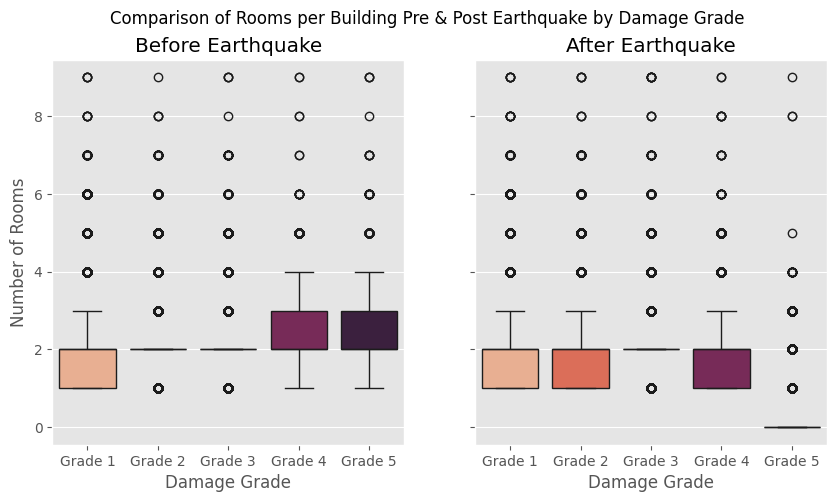

In [45]:
fig, ax = plt.subplots(1,2,figsize = (10,5), sharey='row')
fig.suptitle("Comparison of Rooms per Building Pre & Post Earthquake by Damage Grade")
ax[0].set_title("Before Earthquake")
ax[1].set_title("After Earthquake")
sns.boxplot(data = df,
            x = "damage_grade",
            y = "count_floors_pre_eq",
            order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'],
            ax = ax[0],
            palette = "rocket_r")
sns.boxplot(data = df,
            x = "damage_grade",
            y = "count_floors_post_eq",
            order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'],
            ax = ax[1],
            palette = "rocket_r")
plt.setp(ax[:], xlabel='Damage Grade')
plt.setp(ax[0], ylabel='Number of Rooms')
plt.setp(ax[1], ylabel=None)
plt.show()

del ax, fig

The plot above looks at the number of rooms a building had before and after the earthquake.

Focusing on the left plot (before earthquake) it shows the distribution of rooms that building had. Across all grades the vast majority of buildings had between 1 and 4 rooms, there are however a number of outliers per grade in which there were as many as 9 rooms across all grades. We can see a bit of a pattern emerging, moving from grades 1 - 5, the core distribution of rooms appears to grow. Essentially building with more rooms pre earthquake tend to have a worse outcome assessment. This might be based on area, in proximity to the earthquakes epicentre or another reason entirely.

Focussing on the right plot(after earthquake) we can see a pattern that higher damage grades equate to lower distribution of rooms than before. Lower damage grades tend to have a very similar distribution. In the following sections, a new feature could be interesting in which we extract the difference between these two variables.


#### eCDF for Building Age


In [46]:
def ecdf(series):
    ''' This function calculates the empirical cumulative distribution function (eCDF) for a series of real numbers'''
    # Number of data points
    n = len(series)

    # Sort output
    x = np.sort(series)

    # Sequence proportion
    y = np.arange(1, n+ 1) / n * 100

    # Return dataframe
    return pd.DataFrame({'x':x, 'y':y})

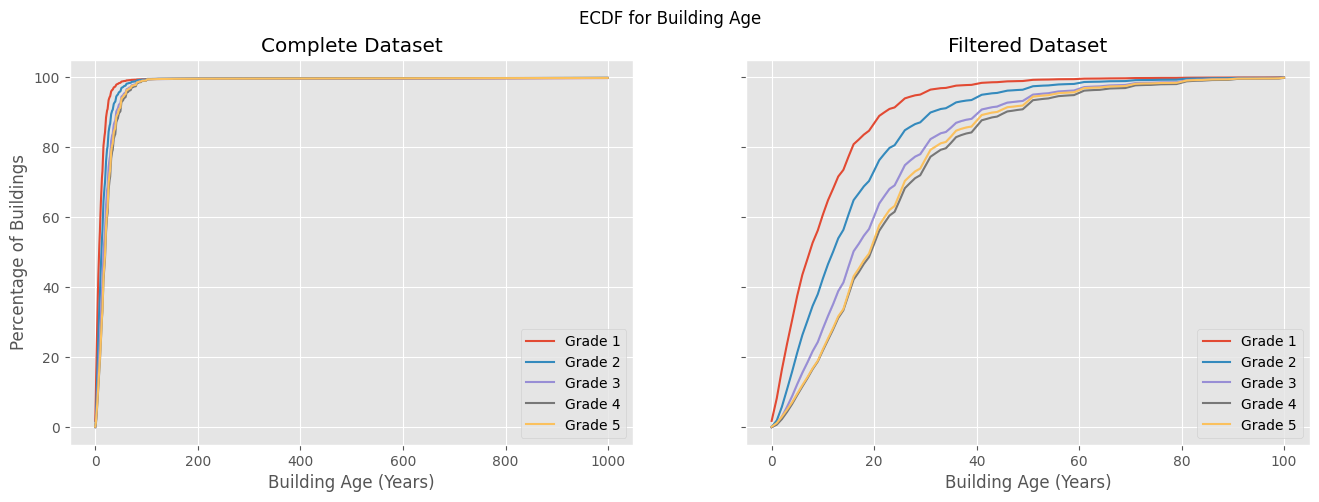

In [47]:
# List each grade
v_grades = ['Grade ' + str(x) for x in range(1,6)]

# Create a plot template
fig, ax = plt.subplots(1,2, figsize = (16,5), sharey='row')
fig.suptitle("ECDF for Building Age")
ax[0].set_title("Complete Dataset")
ax[1].set_title("Filtered Dataset")

# Create a ecdf for each grade
for grade in v_grades:
    df_temp = df[df.damage_grade == grade] # filter for grade only
    df_temp = ecdf(df_temp.age_building) # Compute ecdf for grade
    sns.lineplot(data = df_temp, x = 'x', y = 'y', label = grade, ax = ax[0]) # Generate line plot
    del df_temp

# Create a ecdf for each grade - Without the outliers
for grade in v_grades:
    df_temp = df[(df.damage_grade == grade) & (df.age_building <= 100)] # filter
    df_temp = ecdf(df_temp.age_building) # Compute ecdf for grade
    sns.lineplot(data = df_temp, x = 'x', y = 'y', label = grade, ax = ax[1]) # Generate line plot
    del df_temp

# show plot
plt.setp(ax[:], xlabel='Building Age (Years)')
plt.setp(ax[0], ylabel='Percentage of Buildings')
plt.setp(ax[1], ylabel=None)
plt.show()

# Clear objects
del grade, v_grades, fig, ax

The plot above shows the empirical cumulative distribution for the building's age split by damage grade. The descriptive stats indicated that there might be outliers, so the plot has been duplicated for the complete and a filtered number of observations. The ecdf highlights a relationship between building age and damage grade, as a buildings age increases it becomes more associated with higher damage grades.


C:\Users\ainma\AppData\Local\Temp\ipykernel_3976\1125167355.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




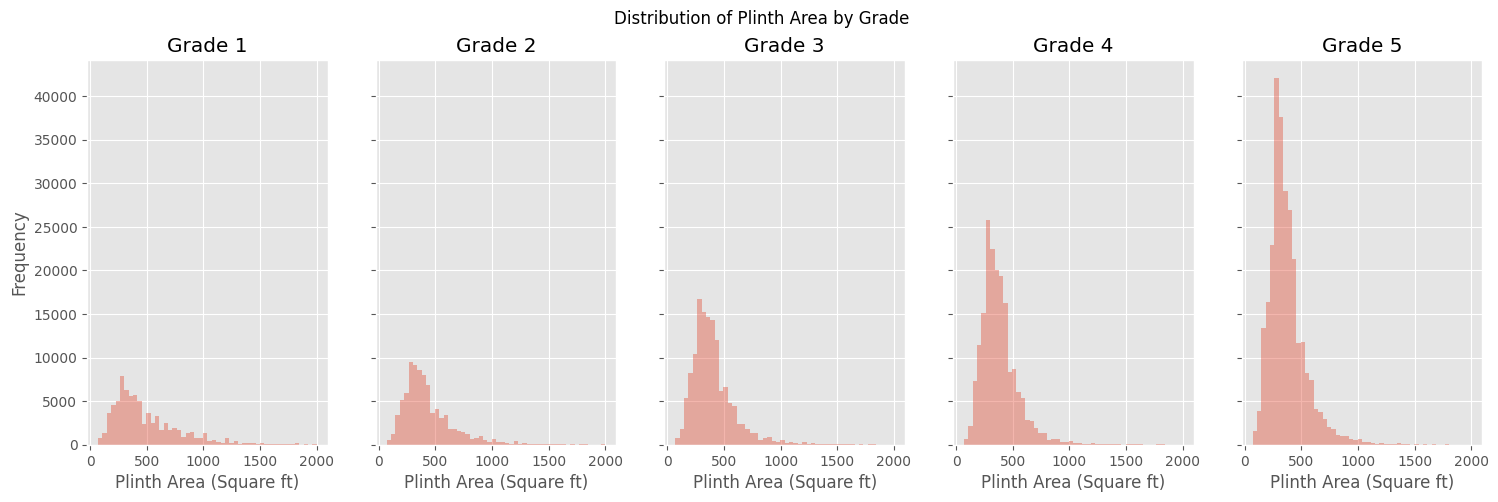

In [48]:
# List of grades
v_grades = ['Grade ' + str(x) for x in range(1,6)]

# Plot structure
fig, ax = plt.subplots(1, 5, figsize=(18,5), sharey="row", sharex="row")
fig.suptitle("Distribution of Plinth Area by Grade")

# Build plot
count = 0
for grade in v_grades:
    df_temp = df[(df.damage_grade == grade) & (df.plinth_area_sq_ft <= 2000)] # filter for grade
    ax[count].set_title(grade)
    sns.distplot(a = df_temp['plinth_area_sq_ft'], label = grade, kde=False, ax=ax[count])
    del df_temp
    count += 1

# Plot Aesthetics
plt.setp(ax[:], xlabel='Plinth Area (Square ft)')
plt.setp(ax[0], ylabel='Frequency')
plt.show()

# Clear objects
del grade, v_grades, fig, ax, count

The plot above shows the distribution of the buildings plinth area by grade. Ignoring the height of the bars between grades, we can see that the building area generally has the same distribution with a peak of circa 250 sq ft. I would have hoped to have seen a different distribution within the grades, but as these aren't really present, it indicates this variable will have limited predictive capacity.


#### Comparison of Building Height Pre & Post Earthquake by Damage Grade


C:\Users\ainma\AppData\Local\Temp\ipykernel_3976\841804326.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\ainma\AppData\Local\Temp\ipykernel_3976\841804326.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




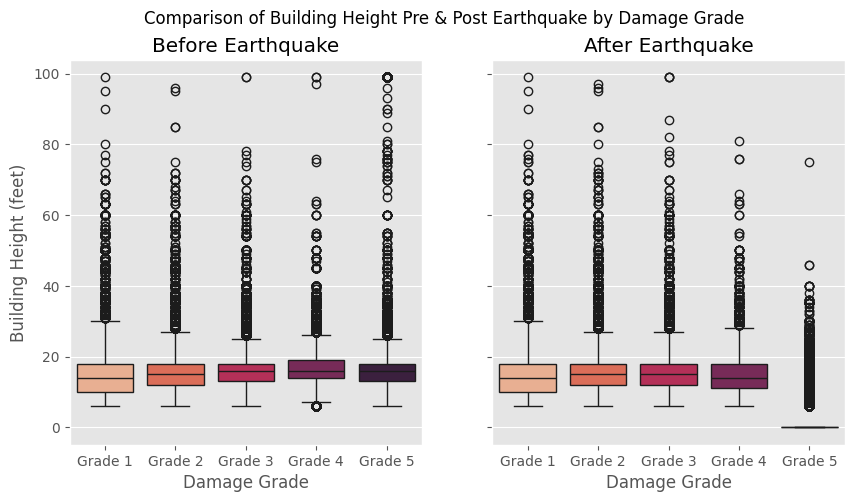

In [49]:
fig, ax = plt.subplots(1,2,figsize = (10,5), sharey='row')
fig.suptitle("Comparison of Building Height Pre & Post Earthquake by Damage Grade")
ax[0].set_title("Before Earthquake")
ax[1].set_title("After Earthquake")
sns.boxplot(data = df,
            x = "damage_grade",
            y = "height_ft_pre_eq",
            order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'],
            ax = ax[0],
            palette = "rocket_r")
sns.boxplot(data = df,
            x = "damage_grade",
            y = "height_ft_post_eq",
            order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'],
            ax = ax[1],
            palette = "rocket_r")
plt.setp(ax[:], xlabel='Damage Grade')
plt.setp(ax[0], ylabel='Building Height (feet)')
plt.setp(ax[1], ylabel=None)
plt.show()

# clear objects
del fig, ax

The plot above shows the distribution of building heights before and after the earthquate by damage grade. For damage grades 1-3, the general distribution building heights are unchanged between before and after the quake. Damage grade 4 displays a slight reduction in height between the two time periods, while damage grade 5 drops to zero for the bulk of the distribution indicating these building complete fell down.


#### Mean Occurence of each Superstructure Variables


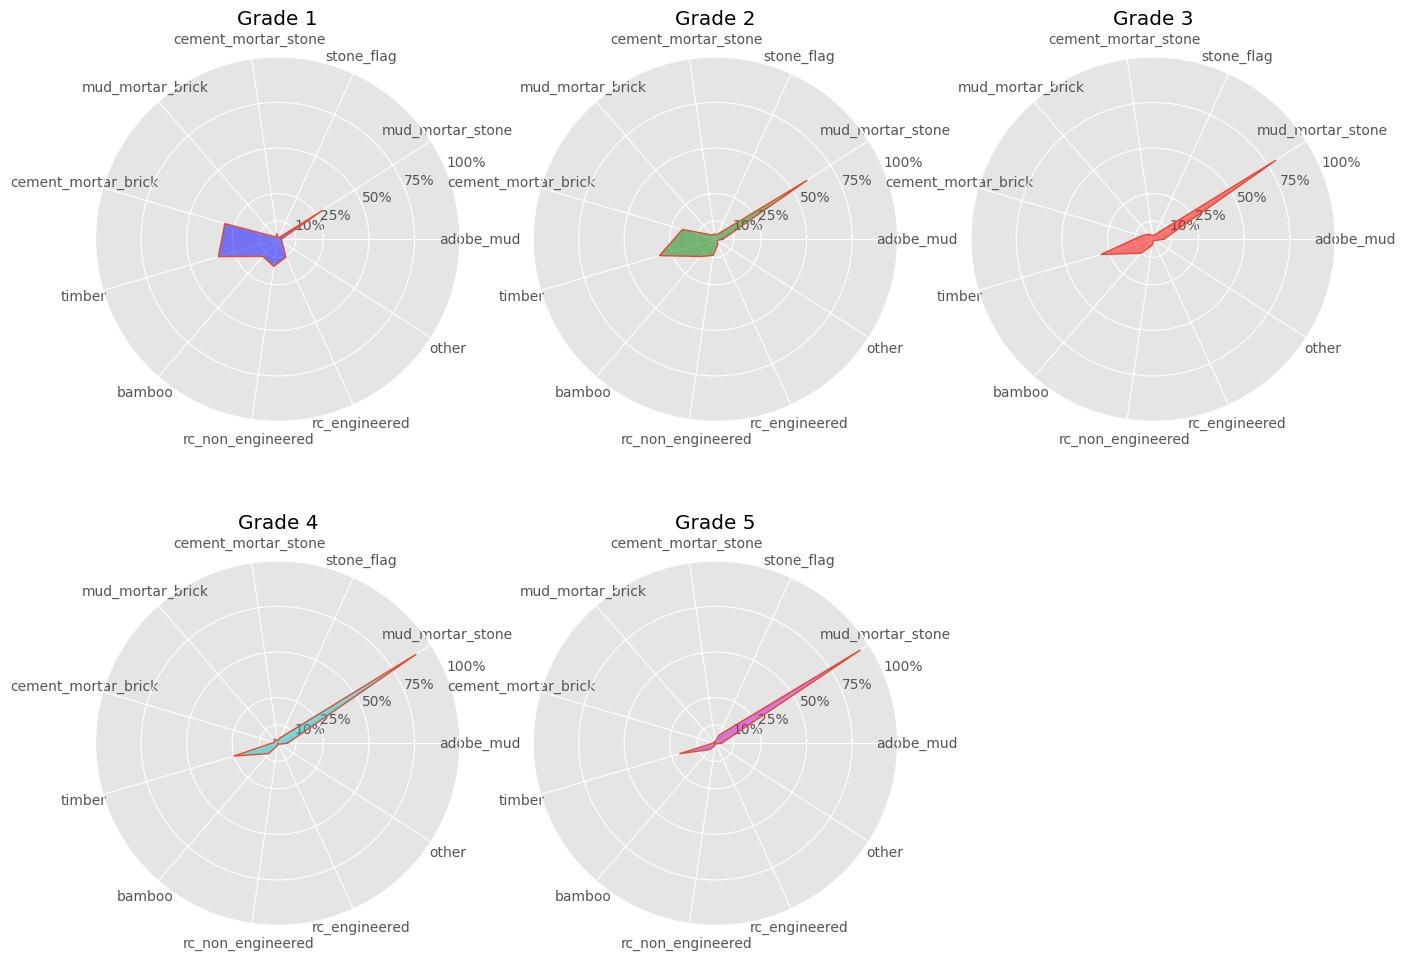

In [50]:
# list of binary columns
v_cols = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
          'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
          'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick',
          'has_superstructure_timber', 'has_superstructure_bamboo',
          'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered',
          'has_superstructure_other']

# New Names of Binary Cols
v_names = {'has_superstructure_adobe_mud':'adobe_mud',
           'has_superstructure_mud_mortar_stone':'mud_mortar_stone',
          'has_superstructure_stone_flag':'stone_flag',
           'has_superstructure_cement_mortar_stone':'cement_mortar_stone',
          'has_superstructure_mud_mortar_brick':'mud_mortar_brick',
           'has_superstructure_cement_mortar_brick':'cement_mortar_brick',
          'has_superstructure_timber':'timber',
           'has_superstructure_bamboo':'bamboo',
          'has_superstructure_rc_non_engineered':'rc_non_engineered',
           'has_superstructure_rc_engineered':'rc_engineered',
          'has_superstructure_other':'other'}

# Summarise and rename columns
df_temp = df.groupby('damage_grade')[v_cols].agg('mean').reset_index()
df_temp.rename(columns=v_names, inplace = True)

# Lists to use
v_grades = ['Grade ' + str(x) for x in range(1,6)]
v_colour = ['b', 'g', 'r', 'c', 'm']

# number of variables
v_categories = list(df_temp)[1:]
v_N = len(v_categories)

# Angles
v_angles = [n / float(v_N) * 2 * pi for n in range(v_N)]
v_angles += v_angles[:1]

# Initialise the plot
fig, ax = plt.subplots(2,3, figsize = (16,12), subplot_kw=dict(polar=True))

# Format axis
plt.setp(ax, # X
         xticks = v_angles[:-1],
         xticklabels = v_categories,
         yticks = [0.10,0.25,0.50,0.75,1.0],
         yticklabels = ["10%","25%","50%","75%","100%"],
         ylim = (0,1))

# Populate plot in a loop
count, row, col = 0, 0, 0
for grade in v_grades:
    values = df_temp.loc[count].drop('damage_grade').values.flatten().tolist()
    values += values[:1]
    ax[row, col].plot(v_angles, values, linewidth=1, linestyle='solid', label=grade)
    ax[row, col].fill(v_angles, values, v_colour[count], alpha=0.5)
    ax[row, col].set_title(grade)

    # Increment counters
    if count >= 2: # Ensure reference correct row
        row = 1

    if col < 2: # Ensure reference correct col
        col += 1
    else:
        col = 0

    count += 1 # increase count var

# Drop 6th subplot
fig.delaxes(ax[1,2])

# Clear objects
del v_cols, v_names, df_temp, v_grades, v_colour,\
    v_categories, v_N, v_angles, fig, ax, count, row, col, grade, values

The plot above summarises the mean occurence of each of the superstructure variables. There is a radar plot for each grade with the height of the bar indicating which attributes were present the most frequently across all buildings. Buildings 4 & 5 (those which sustained the most damage), are almost all associated with the super structure mud, mortar and store. This super structure is present in grades 1 - 3 but to a much lower concentration. Grade 1, is the most spread with regards to super strucutres, aligning with timber and brick in fair amounts.
